# 9. Simulation

The Logistic Regression, also called a logit model, is a method for fitting a regression curve $y=f(x)$ in which the response variable (dependent variable) $y$ is a **categorical** variable (dichotomous outcome variable) such as True/False or 0/1. 

In the logit model it actually measures the **log odds** of the outcome given a linear combination of a set of predictors $x$. The predictors can be continuous, categorical or a mix of both.

The categorical variable y, in general, can assume different values. In the simplest case scenario y is binary meaning that it can assume either the value 1 (Yes) or 0 (No). In this post we call the model “binomial logistic regression”, however, logistic regression can also be used to predict an outcome with more than 2 categories. In this second case we call the model “multinomial logistic regression”. A typical example for instance, would be classifying marketing campaign between “failure”, “non existent” or “success”.

## Implementation in R

Logistic regression is implemented in R using `glm()` by predicting the primary outcome of interest using features or variables in the dataset.

* `formula` - specify the relationship between variables and the outcome of interest
* `data` - the dataset used to train the model 
* `family` - R object to specify the details of the model. In logistic regression, its value is binomial


## The Dataset

We would use a dataset from the 2021 National Youth Tobacco Survey (NYTS) in the `RforHDSdata` package called `nyts`. This dataset contains 20,413 participants and a set of variables relating to demographic information, frequency of tobacco use, and methods of obtaining said tobacco as reported by students on the 2021 NYTS. One question from this study was whether... (TODO). The objective of the logistic regression model is to predict whether ... or not based on the predictor variables, such as demographic information.

**Jialin Note**: applicability? What's the outcome of interest? For example, students quit smoking. 


In [1]:
remotes::install_github("joannamwalsh/RforHDSdata") 
library(RforHDSdata)
data(nyts)

Skipping install of 'RforHDSdata' from a github remote, the SHA1 (8708a224) has not changed since last install.
  Use `force = TRUE` to force installation



In [2]:
head(nyts)

,location,age,sex,grade,otherlang,grades_in_past_year,perceived_cigarette_use,perceived_e_cig_use,race_and_ethnicity,LGBT,⋯,bought_from_gas_station,bought_from_grocery_store,bought_from_drugstore,bought_from_mall,bought_from_vending_machine,bought_from_internet,bought_through_mail,bought_through_delivery,bought_from_smoke_shop,bought_elsewhere
,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,In a school building/classroom,11,Female,6th,Yes,Mostly B's,0,0,Hispanic,Not Sure,⋯,0,0,0,0,0,0,0,0,0,0
2,In a school building/classroom,12,Male,6th,No,Mostly A's,0,0,non-Hispanic White,No,⋯,0,0,0,0,0,0,0,0,0,0
3,In a school building/classroom,12,Female,6th,Yes,Mostly A's,0,0,Hispanic,NA,⋯,0,0,0,0,0,0,0,0,0,0
4,In a school building/classroom,12,Female,6th,No,Mostly A's,0,0,non-Hispanic White,Not Sure,⋯,0,0,0,0,0,0,0,0,0,0
5,In a school building/classroom,11,Female,6th,NA,NA,NA,NA,Hispanic,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,In a school building/classroom,12,Male,6th,Yes,Mostly A's,0,0,non-Hispanic other race,NA,⋯,0,0,0,0,0,0,0,0,0,0


In [3]:
# use an in-built dataset instead

# Select some columns form mtcars.
mtcars <- mtcars[,c("am", "cyl", "hp", "wt", "vs", "carb")]

head(mtcars)

,am,cyl,hp,wt,vs,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,1,6,110,2.620,0,4
Mazda RX4 Wag,1,6,110,2.875,0,4
Datsun 710,1,4,93,2.320,1,1
Hornet 4 Drive,0,6,110,3.215,1,1
Hornet Sportabout,0,8,175,3.440,0,2
Valiant,0,6,105,3.460,1,1


## Model Fitting

In [4]:
model1 <- glm(am ~ cyl + hp + wt, data = mtcars, family = "binomial")
summary(model1)


Call:
glm(formula = am ~ cyl + hp + wt, family = "binomial", data = mtcars)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) 19.70288    8.11637   2.428   0.0152 *
cyl          0.48760    1.07162   0.455   0.6491  
hp           0.03259    0.01886   1.728   0.0840 .
wt          -9.14947    4.15332  -2.203   0.0276 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 43.2297  on 31  degrees of freedom
Residual deviance:  9.8415  on 28  degrees of freedom
AIC: 17.841

Number of Fisher Scoring iterations: 8


The output shows the coefficients for predictors, their standard errors, the z-statistic (sometimes called a Wald z-statistic), and the associated p-values. Both `hp` and `wt` are statistically significant, as their p-values are less than our default significance level ($\alpha = 0.05$). The logistic regression coefficients give the change in the log odds of the outcome for a one unit increase in the predictor variable.

* For every one unit change in number of cylinders `cyl`, the log odds of manual transmission (versus automatic transmission) increases by 0.48760.
* For a one unit increase in gross horsepower `hp`, the log odds of manual transmission increases by 0.03259.
* For each unit increase in weight (1000 lbs) `wt`, the log odds of manual transmission decreases by 9.14947.
* For indicator variables, we will have a slightly different interpretation. For example, the categorical variable with value of 1, versus value of 0, changes the log odds of outcome by certain coeffcients amount.

Below the table of coefficients are fit indices, including the null and deviance residuals and the AIC. Later we show an example of how you can use these values to help assess model fit.

## Diagnostic Plots
Next we see the deviance residuals, which are a measure of model fit. The first part of the above output shows the distribution of the deviance residuals for individual cases used in the model. Below we discuss how to use summaries of the deviance statistic to assess model fit. Let’s look at the residuals from this model. Change type to “deviance” below to get the deviance residuals.

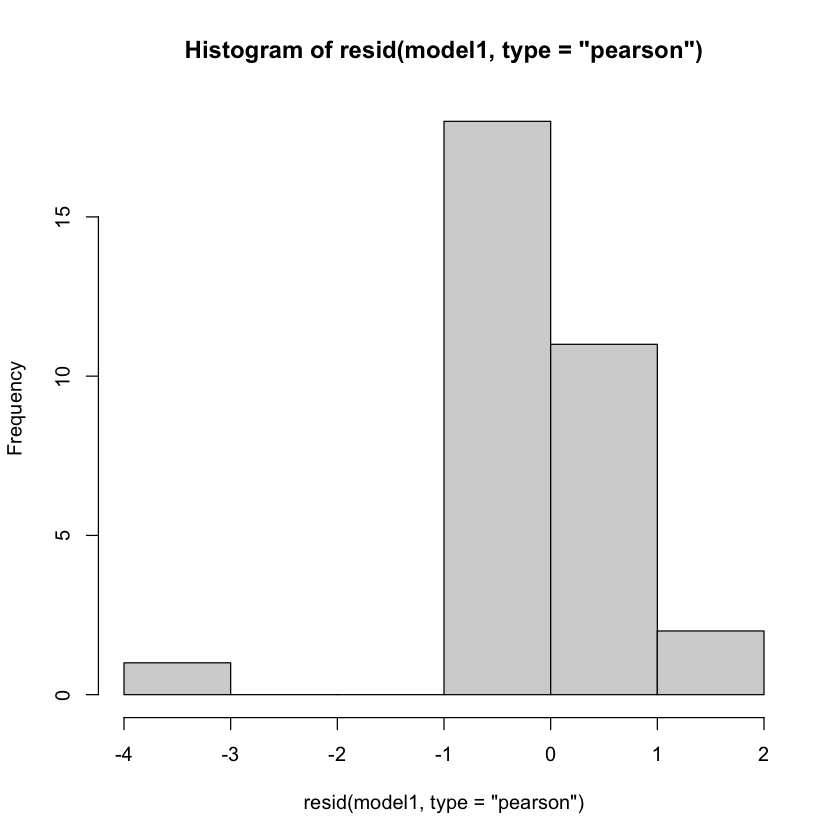

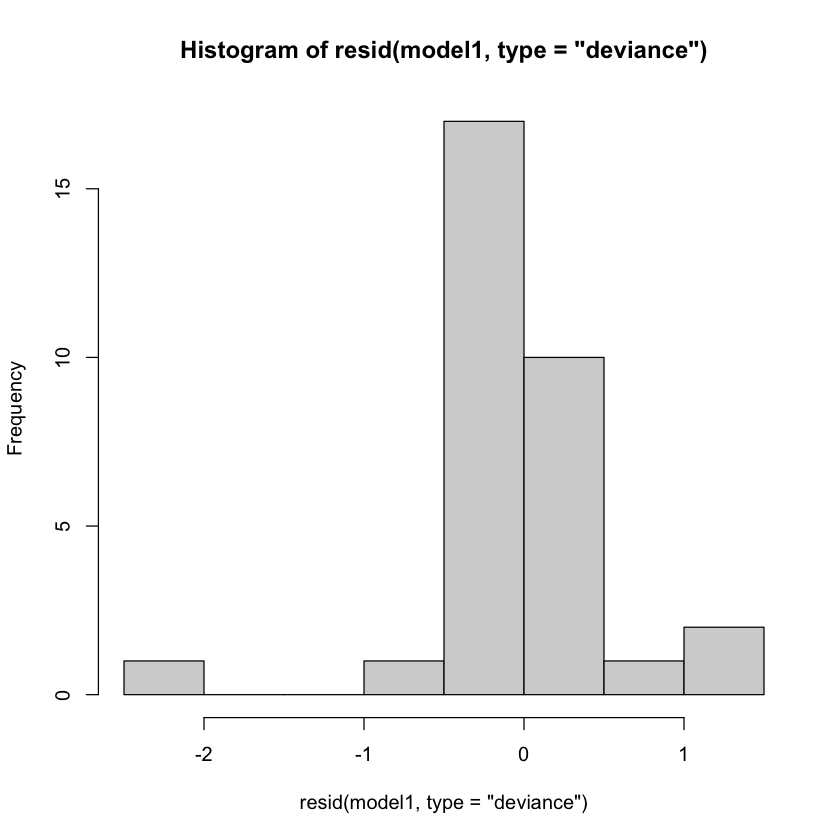

In [5]:
hist(resid(model1, type="pearson"))
hist(resid(model1, type="deviance"))

## Predictability of the Model

In the steps above, we briefly evaluated the fitting of the model, now we would like to find the predicted
probabilities. By setting the parameter type='response', R will output probabilities in the form of P(y=1|X). Our decision boundary will be 0.5. If P(y=1|X) > 0.5 then y = 1 otherwise y=0. Note that for some applications different thresholds could be a better option. When we add in `type=“response”` to the code below it indicates that we want the predicted probabilities instead of the predicted log odds.

In [6]:
pred_probs <- predict(model1, type="response")
pred_ys <- ifelse(pred_probs > 0.5, 1, 0)
table(mtcars$am, pred_ys)

misClasificError <- mean(pred_ys != mtcars$am)
print(paste('Accuracy', 1-misClasificError))

   pred_ys
     0  1
  0 18  1
  1  2 11

[1] "Accuracy 0.90625"


The 0.90626 accuracy on the test set is quite a good result. Then, let's still observe the accuracy. 

In [7]:
library(caret)
confusionMatrix(as.factor(pred_ys),as.factor(mtcars$am), positive='1')

ERROR: Error in library(caret): there is no package called ‘caret’


We can also check the calibration. The code below plots a calibration plot. We have to add the predicted
probabilities to the data frame to use this function.

also installing the dependency ‘RConics’





The downloaded binary packages are in
	/var/folders/97/764q45kd0qj8hgsn4mm36sx40000gn/T//Rtmpk1I1g2/downloaded_packages


$calibration_plot


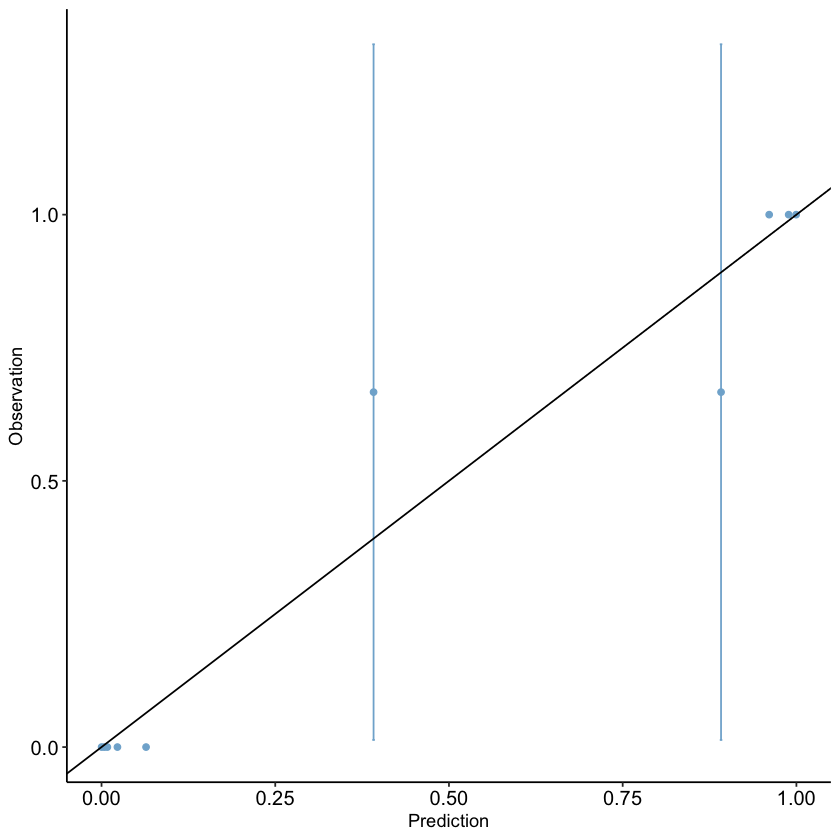

In [33]:
install.packages("predtools")
library(predtools)
mtcars$pred <- pred_probs
calibration_plot(data = mtcars, obs = "am", pred = "pred")

As a last step, we are going to plot the *ROC* curve and calculate the *AUC* (area under the curve) which are typical performance measurements for a binary classifier. As a rule of thumb, a model with good predictive ability should have an AUC closer to 1 (1 is ideal) than to 0.5.


The downloaded binary packages are in
	/var/folders/97/764q45kd0qj8hgsn4mm36sx40000gn/T//Rtmpk1I1g2/downloaded_packages


Setting levels: control = 0, case = 1

Setting direction: controls < cases



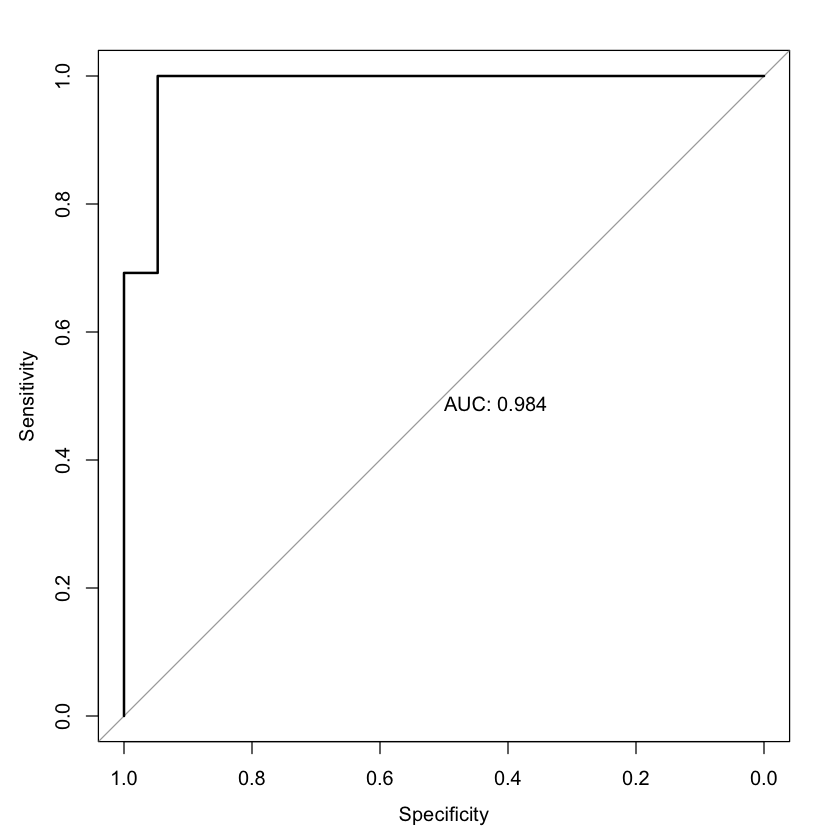

In [28]:
install.packages("pROC")
library(pROC)
roc_mod <- roc(predictor=pred_probs, response=mtcars$am)
plot(roc_mod, print.auc=TRUE)